# Introduction to Raspberry Pi

<img src=https://www.raspberrypi.com/app/uploads/2022/02/COLOUR-Raspberry-Pi-Symbol-Registered.png width="350" height="300">

credits: Prof Maurizio Martinelli

# What is a Raspberry Pi?

A Raspberry Pi is a mini computer based on the ARM architecture designed to increase accessibility to computing.
It is designed to be cheap and easy to use, and is a great way to learn about computers and programming.

# Raspberry Pi in a Glance


![rpi4-labelled](https://www.piday.org/wp-content/uploads/2018/09/word-image-2.png)

# Hardware

## Basics

- **CPU** Broadcom BCM2711, Quad core Cortex-A72 (ARM v8) 64-bit SoC @ 1.8GHz
- **RAM** 1GB, 2GB, 4GB or 8GB LPDDR4-3200 SDRAM (depending on model)
- **Storage** Micro-SD card slot for loading operating system and data storage

## Connectivity 

- **WiFi** 2.4 GHz and 5.0 GHz IEEE 802.11ac wireless, Bluetooth 5.0, BLE
- **Wired Network** Gigabit Ethernet

## Ports

- **USB** 2 USB 3.0 ports; 2 USB 2.0 ports.
- **Peripherals** Raspberry Pi standard 40 pin GPIO header (fully backwards compatible with previous boards)
- **Video** 2 × micro-HDMI® ports (up to 4kp60 supported)
- **Display** 2-lane MIPI DSI (*Display Serial Interface*) display port
- **Camera** 2-lane MIPI CSI (*Camera Serial Interface*) camera port
- **Audio** 4-pole stereo audio and composite video port

## Graphics

- **Codecs** H.265 (4kp60 decode), H264 (1080p60 decode, 1080p30 encode)
- **API (Application Programming Interface)** OpenGL ES 3.1, Vulkan 1.0[^note]

[^note]: same as PlayStation3, Xbox 360, PSP, PS Vita, Nintendo Switch, and many Android devices

## Operation

- **Power** 
  - 5V DC via USB-C connector (minimum 3A*)
  - 5V DC via GPIO header (minimum 3A*)
  - Power over Ethernet (PoE) enabled (requires separate PoE HAT)
- **Environment** Operating temperature: 0 – 50 degrees C ambient

# Software

## Operating System

Raspberry Pi OS is the recommended operating system for normal use on a Raspberry Pi.
It is usually installed on a microSD card and booted from there.

It is substantially a light-weight version of Debian Linux, with a few tweaks to make it run better on the Raspberry Pi.

## Programming Languages

Raspberry Pi OS comes with a number of programming languages pre-installed, including *python* and *C++*.

## Additional Software

If you want to install additional software, you can use the *apt* package manager to install software from the official repositories.

```bash
sudo su - 
apt-get update
apt-get install python3-matplotlib
apt-get install python3-scipy
```

It should be noticed that the Raspberry Pi is not a very powerful computer, and the official package manager may provide the most optimised version of the required software, even if not up-to-date.

# Using a Raspberry Pi

Before starting the Raspberry Pi, you need to install the operating system on a microSD card.

Once the OS is installed, you can insert the microSD card into the Raspberry Pi and power it on by plugging in the power adapter.

To use the Raspberry Pi, you need to connect it to a monitor (HDMI), keyboard and mouse (USB).

# Install Camera

We provide a [Pi camera](https://www.raspberrypi.com/documentation/accessories/camera.html#preparing-the-software) for each Raspberry Pi. You can install the camera on the Raspberry Pi by plugging the camera interface to the Raspberry Pi CSI (labelled *CAMERA*).

<iframe width="683" height="400" src="https://www.youtube.com/embed/GImeVqHQzsE" title="Camera board setup" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# Acquire Images and Videos

There is official software from Raspberry Pi to acquire images and videos from the camera, namely the [libcamera](https://www.raspberrypi.com/documentation/computers/camera_software.html#getting-started) software stack and the [Picamera2](https://datasheets.raspberrypi.com/camera/picamera2-manual.pdf?_gl=1*1eut7jm*_ga*MTgwODA1ODYxNy4xNjkzNzI0MzIx*_ga_22FD70LWDS*MTY5MzcyNzEwNS4yLjEuMTY5MzcyODk3My4wLjAuMA..) Python library.

We found though that the [OpenCV](http://opencv.org/) library is more convenient to use, and it is also more powerful. See the tutorial next.


# Data Analysis

You can use whatever you like to analyse the data, but we recommend using Python and the [Jupyter Notebook](https://jupyter.org/).
In case you find the Raspberry Pi too slow for your analysis, you can use your own computer or [Google Colab](http://colab.research.google.com/) to analyse the data.

## Install Jupyter Notebook

To install Jupyter Notebook on the Raspberry Pi, you can use the following commands (assuming `python3-matplotlib` and `python3-scipy` are already installed, see above):

```bash
pip3 install --upgrade pip 
reboot
pip3 install jupyter
```

## Plotting data
A quick reminder on how to plot data in Python using the `matplotlib` library.

In [7]:
from matplotlib import pyplot as plt
import numpy as np

An example of plotting a cosine and sine wave:

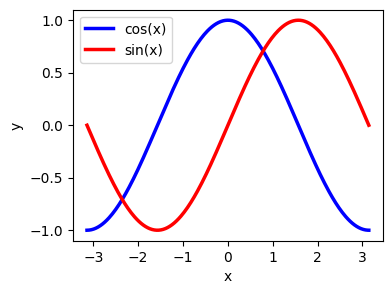

In [8]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.figure(figsize=(4,3))
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cos(x)")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')

## Fitting data

Installing ROOT on a Raspberry Pi is not trivial. 
We recommend using the [iminuit](https://iminuit.readthedocs.io/en/latest/) library, which is a Python interface to the [Minuit](https://seal.web.cern.ch/seal/snapshot/work-packages/mathlibs/minuit/) library.

```bash
pip3 install iminuit
```

Let's see how to use it to fit a sine distribution to a set of data.

Text(0, 0.5, 'y')

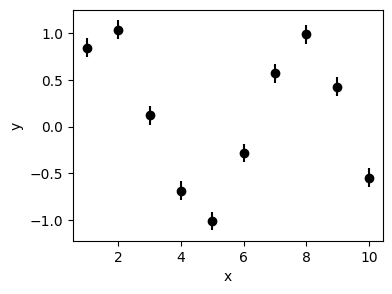

In [9]:
X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.sin(X)+np.random.normal(0,0.05,10)
sY= np.ones(10)*0.1
plt.figure(figsize=(4,3))
plt.errorbar(X,Y,sY,fmt='o',color='black')
plt.xlabel("x")
plt.ylabel("y")

### Fitting Function

We need to specify the fitting function, which is a sine function in this case:

In [10]:
def func(x,A,w,phi):
    return A*np.sin(w*x+phi)

### iMinuit

`iMinuit` can be loaded with the following commands:

In [11]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

and is called with the following syntax:

In [12]:
least_squares = LeastSquares (X, Y, sY, func)
my_minuit = Minuit (least_squares, A = 1, w = 1, phi=0)  # starting values for A, w, and phi
my_minuit.migrad ()  # finds minimum of least_squares function
my_minuit.hesse ()   # accurately computes uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.51 (χ²/ndof = 0.4)       │              Nfcn = 77               │
│ EDM = 1.39e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   1.02    │   0.04    │            │            │         │         │       │
│ 1 │ w    │   1.003   │   0.015   │            │            │         │         │       │
│ 2 │ phi  │   -0.06   │   0.10    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────────────────────────┐
│     │        A        w      phi │
├─────┼────────────────────────────┤
│   A │  0.00202  0.01e-3  -0.0002 │
│   w │  0.01e-3 0.000229 -1.35e-3 │
│ phi │  -0.0002 -1.35e-3  0.00985 │
└─────┴────────────────────────────┘

## iMinuit in Colab

If you want to use `iminuit` in Colab, you can install it via pip in your notebook by calling

```python
%pip install iminuit
```

## ROOT with C++

As alternative to `iminuit`, you can use ROOT with C++ to fit your data.